
# Executive Summary 


# Summary of Findings: Iowa Liquor Data

### Purpose:
I was contracted by the Iowa state liquor board to predict liquor sales for all of 2016, based on sales from all of 2015 and the first quarter of 2016.

The prediction model I created estimated that the total sales in dollars for all of 2016 will be $292,830,324. This is an increase of 6.4 percent over 2015.

### Data:
The data I was provided contained transaction data for all class E liquor stores in the state of Iowa, with details about the location, type of alcohol purchased, volume purchased, price and state markup. 

### Variable Selection:
To conduct the analysis, I grouped several statistics by store to get a sense of how the different variables were related. After a preliminary analysis of the transformed data by store I found that nearly all of the numeric variables, such as volume sold, price per bottle, etc were highly correlated with each other. The multivariate linear model assumes that the variables, or “X” values are independent of each other when building the model.  Since all of the variables are so highly correlated is is best to choose only one to construct the model. I chose the total sales by store in Quarter 1.

### Model Building:
Since the goal of the model is to predict the sales for the entire year based on the first quarter, I built the model to take the first quarter 2015 sales and predict the quarter two, three and four sales for 2015. 

### Testing
Since there was so much data to work with I held 20 percent of it in reserve to evaluate the effectiveness of the model. My model was able to account for 93.3 percent of the variance between the predicted values and the actual values

### Final Results

The model predicted a total sales in Quarters 2, 3 and 4 in 2016 of 227,303,980 dollars, for a total of 292,830,324 dollars when we include the Q1 data already in the csv file.


### Limitations
This model does not account for any potential changes in economic conditions or tax policy in the remainder of 2016, and is solely based on the stores that were operating as of Q1 2016. Further research and insight from economist could result in a model that includes economic variables.


# Code

In [ ]:
import pandas as pd

## Load the data into a DataFrame
data = pd.read_csv('/Users/markmummert/desktop/Iowa_Liquor_Sales_reduced.csv') # for final run
# data = pd.read_csv('/Users/markmummert/desktop/Iowa_Liquor_sales_sample_10pct.csv') # for coding

data.columns

### Converting the date column

In [241]:
## Transform the dates if needed, e.g.
# data["Date"] = pd.to_datetime(data["Date"], format="%m/%d/%y")
data["Date"] = pd.to_datetime(data["Date"])


##I'm concerned about working with the spaces and the () in some of the column names.  I'll change those to underscores
data = data.rename(columns=lambda x: x.replace(' ', '_')) 
data = data.rename(columns=lambda x: x.replace('(', '')) 
data = data.rename(columns=lambda x: x.replace(')', '')) 


## I used this one in the pandas lab - it will use a lambda function to replace the spaces with _
## This will make it easier to work with the columns.

# Explore the data

Perform some exploratory statistical analysis and make some plots, such as histograms of transaction totals, bottles sold, etc.

In [242]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline  


In [243]:
## checking to make sure there are no null values:

data.isnull().sum()

Date                       0
Store_Number               0
City                       0
Zip_Code                   0
County_Number          10913
County                 10913
Category                 779
Category_Name           6109
Vendor_Number              0
Item_Number                0
Item_Description           0
Bottle_Volume_ml           0
State_Bottle_Cost          0
State_Bottle_Retail        0
Bottles_Sold               0
Sale_Dollars               0
Volume_Sold_Liters         0
Volume_Sold_Gallons        0
dtype: int64

In [244]:
## There are some null values in county, category and category name.  What do those look like?

data[data.County_Number.isnull()]   # only show rows where county is missing



,Date,Store_Number,City,Zip_Code,County_Number,County,Category,Category_Name,Vendor_Number,Item_Number,Item_Description,Bottle_Volume_ml,State_Bottle_Cost,State_Bottle_Retail,Bottles_Sold,Sale_Dollars,Volume_Sold_Liters,Volume_Sold_Gallons
4,2016-03-31,5240,WEST BRANCH,52358,NaN,NaN,1081200.0,CREAM LIQUEURS,305,73055,Rumchata,750,$12.50,$18.75,6,$112.50,4.50,1.19
114,2016-03-31,5240,WEST BRANCH,52358,NaN,NaN,1011300.0,TENNESSEE WHISKIES,85,86670,Jack Daniel's Tennessee Honey,750,$15.07,$22.61,3,$67.83,2.25,0.59
209,2016-03-31,5240,WEST BRANCH,52358,NaN,NaN,1081400.0,TRIPLE SEC,65,82606,Dekuyper Sour Apple Pucker,750,$6.30,$9.45,3,$28.35,2.25,0.59
271,2016-03-31,5240,WEST BRANCH,52358,NaN,NaN,1081200.0,CREAM LIQUEURS,260,68034,Bailey's Original Irish Cream,375,$7.00,$10.50,3,$31.50,1.12,0.30
288,2016-03-31,5240,WEST BRANCH,52358,NaN,NaN,1081600.0,WHISKEY LIQUEUR,421,64864,Fireball Cinnamon Whisky,375,$5.33,$8.00,6,$48.00,2.25,0.59
290,2016-03-31,5240,WEST BRANCH,52358,NaN,NaN,1081300.0,PEPPERMINT SCHNAPPS,434,81196,Paramount Peppermint Schnapps Traveler,750,$3.75,$5.63,3,$16.89,2.25,0.59
296,2016-03-31,5240,WEST BRANCH,52358,NaN,NaN,1022100.0,TEQUILA,395,87408,Jose Cuervo Especial Silver,750,$10.49,$15.74,6,$94.44,4.50,1.19
323,2016-03-31,5240,WEST BRANCH,52358,NaN,NaN,1062310.0,SPICED RUM,240,45886,Sailor Jerry Spiced Navy Rum,750,$9.65,$14.48,3,$43.44,2.25,0.59
376,2016-03-31,5240,WEST BRANCH,52358,NaN,NaN,1051010.0,AMERICAN GRAPE BRANDIES,259,52316,Christian Bros Brandy,750,$5.92,$8.88,3,$26.64,2.25,0.59
379,2016-03-31,5240,WEST BRANCH,52358,NaN,NaN,1062200.0,PUERTO RICO & VIRGIN ISLANDS RUM,434,45275,Paramount White Rum Traveler,750,$4.00,$6.00,6,$36.00,4.50,1.19


In [245]:
data[data.Category_Name.isnull()]


,Date,Store_Number,City,Zip_Code,County_Number,County,Category,Category_Name,Vendor_Number,Item_Number,Item_Description,Bottle_Volume_ml,State_Bottle_Cost,State_Bottle_Retail,Bottles_Sold,Sale_Dollars,Volume_Sold_Liters,Volume_Sold_Gallons
3638,2016-03-31,2595,DENISON,51442,24.0,Crawford,1082100.0,NaN,322,942899,Rondiaz Coconut Rum,1750,$10.00,$15.00,6,$90.00,10.50,2.77
41883,2016-03-24,2515,MASON CITY,50401,17.0,Cerro Gordo,1022300.0,NaN,330,989202,Del Maguey San Luis Del Rio,750,$40.00,$60.00,6,$360.00,4.50,1.19
43771,2016-03-24,4648,WATERLOO,50703,7.0,Black Hawk,1092100.0,NaN,492,977576,Twenty Grand Gold,375,$7.00,$10.50,6,$63.00,2.25,0.59
82854,2016-03-17,2106,CEDAR FALLS,50613,7.0,Black Hawk,1091100.0,NaN,434,933934,Pearl Caramel,1000,$8.67,$13.01,24,$312.24,24.00,6.34
88787,2016-03-16,2512,IOWA CITY,52240,52.0,Johnson,1022300.0,NaN,330,989202,Del Maguey San Luis Del Rio,750,$40.00,$60.00,6,$360.00,4.50,1.19
98331,2016-03-16,4129,AMES,50010,85.0,Story,1091100.0,NaN,448,932342,St. George Absinthe Verte,750,$30.00,$45.00,6,$270.00,4.50,1.19
119563,2016-03-14,4829,DES MOINES,50314,77.0,Polk,1082100.0,NaN,434,968842,St. Brendan's Irish Cream Liqueur,1000,$7.67,$11.51,120,$1381.20,120.00,31.70
155299,2016-03-07,4806,WEST LIBERTY,52776,70.0,Muscatine,NaN,NaN,410,989624,Patron Reposado,375,$14.50,$21.75,12,$261.00,4.50,1.19
174624,2016-03-02,3869,CORALVILLE,52241,52.0,Johnson,1022200.0,NaN,300,903369,Hussong's Reposado Tequila 100% Agave,750,$20.00,$30.00,6,$180.00,4.50,1.19
185782,2016-03-01,2665,WAUKEE,50263,25.0,Dallas,1082100.0,NaN,305,965074,Giffard Creme de Pamplemousse Rose Pink Grapef...,750,$13.25,$19.88,6,$119.28,4.50,1.19


There are a few empty values, but not a lot.  I think it makes more sense to leave them there for now unless they cause a problem for my data set later.

Since I will be working on the tax scenario, I don't anticipate needing to use zip code/county in my analysis.

In [246]:
data.dtypes

Date                   datetime64[ns]
Store_Number                    int64
City                           object
Zip_Code                       object
County_Number                 float64
County                         object
Category                      float64
Category_Name                  object
Vendor_Number                   int64
Item_Number                     int64
Item_Description               object
Bottle_Volume_ml                int64
State_Bottle_Cost              object
State_Bottle_Retail            object
Bottles_Sold                    int64
Sale_Dollars                   object
Volume_Sold_Liters            float64
Volume_Sold_Gallons           float64
dtype: object

In [247]:
## I will need to convert the cost and retail columns to floats

## I can do this in two steps:


data['State_Bottle_Cost'] = data['State_Bottle_Cost'].str.replace('$','') #Removes the $ in the string to
data['State_Bottle_Cost'] = pd.to_numeric(data['State_Bottle_Cost']) # converts the string to a numeric value
data['State_Bottle_Retail'] = data['State_Bottle_Retail'].str.replace('$','')
data['State_Bottle_Retail'] = pd.to_numeric(data['State_Bottle_Retail'])
data['Sale_Dollars'] = data['Sale_Dollars'].str.replace('$','')
data['Sale_Dollars'] = pd.to_numeric(data['Sale_Dollars'])

data.head()


,Date,Store_Number,City,Zip_Code,County_Number,County,Category,Category_Name,Vendor_Number,Item_Number,Item_Description,Bottle_Volume_ml,State_Bottle_Cost,State_Bottle_Retail,Bottles_Sold,Sale_Dollars,Volume_Sold_Liters,Volume_Sold_Gallons
0,2016-03-31,5029,DAVENPORT,52806,82.0,Scott,1022100.0,TEQUILA,370,87152,Avion Silver,375,9.99,14.99,12,179.88,4.5,1.19
1,2016-03-31,5029,DAVENPORT,52806,82.0,Scott,1022100.0,TEQUILA,395,89197,Jose Cuervo Especial Reposado Tequila,1000,12.50,18.75,2,37.50,2.0,0.53
2,2016-03-31,4959,CEDAR FALLS,50613,7.0,Black Hawk,1071100.0,AMERICAN COCKTAILS,380,63959,Uv Blue Raspberry Lemonade Pet,1750,5.97,8.96,6,53.76,10.5,2.77
3,2016-03-31,2190,DES MOINES,50314,77.0,Polk,1031200.0,VODKA FLAVORED,205,40597,New Amsterdam Red Berry,200,2.24,3.36,48,161.28,9.6,2.54
4,2016-03-31,5240,WEST BRANCH,52358,NaN,NaN,1081200.0,CREAM LIQUEURS,305,73055,Rumchata,750,12.50,18.75,6,112.50,4.5,1.19


## Describing the text columns

### City

In [248]:
data.City.describe()

##It looks like there's 385 different cities and Des Moines appear the most often.  Nothing that looks too remarkable

count        2709552
unique           386
top       DES MOINES
freq          237791
Name: City, dtype: object

### Date

In [249]:
data.Date.describe()

## so this covers January 2015 to at least March 2016

count                 2709552
unique                    284
top       2015-12-01 00:00:00
freq                    15588
first     2015-01-05 00:00:00
last      2016-03-31 00:00:00
Name: Date, dtype: object

### Store Number

In [250]:
len(data.Store_Number.unique())


1403

In [251]:
data.Category_Name.describe()
## 71 unique values, the most popular is the 80-proof vodka.  It's significantly larger than the next lowest category.

count            2703443
unique                73
top       VODKA 80 PROOF
freq              353491
Name: Category_Name, dtype: object

In [252]:
data.Item_Description.describe()

count          2709552
unique            3029
top       Black Velvet
freq             72432
Name: Item_Description, dtype: object

In [253]:
data.Item_Description.value_counts()

Black Velvet                                72432
Hawkeye Vodka                               65906
Five O'clock Vodka                          45653
Smirnoff Vodka 80 Prf                       34212
Captain Morgan Spiced Rum                   34157
Seagrams 7 Crown Bl Whiskey                 32918
Fireball Cinnamon Whiskey                   32396
Jack Daniels Old #7 Black Lbl               31582
Absolut Swedish Vodka 80 Prf                29383
Jim Beam                                    28008
Bacardi Superior Rum                        27441
Admiral Nelson Spiced Rum                   27383
Jagermeister Liqueur                        25050
Mccormick Vodka Pet                         24311
Five Star                                   23664
Grey Goose Vodka                            22792
Crown Royal Canadian Whisky                 22771
Paramount White Rum                         22622
Jose Cuervo Especial Reposado Tequila       22103
Uv Blue (raspberry) Vodka                   21373


## Examining Numeric Columns

### Volume Sold

In [254]:
data['Volume_Sold_Liters'].describe()

## Something seems wrong here - 2500 liters is huge...

count    2.709552e+06
mean     8.921504e+00
std      2.824435e+01
min      0.000000e+00
25%      1.500000e+00
50%      5.250000e+00
75%      1.050000e+01
max      3.960000e+03
Name: Volume_Sold_Liters, dtype: float64

In [255]:
data.Volume_Sold_Liters[data['Volume_Sold_Liters'] > 2000]

206462     2037.0
236357     2037.0
237116     2037.0
257398     2037.0
268934     2100.0
312159     2100.0
614629     2880.0
935189     2037.0
992557     2362.5
1050144    2100.0
1105245    2178.0
1384824    3150.0
1557644    3300.0
1767210    2508.0
1806256    2520.0
1865411    3055.5
1935214    2625.0
2000081    2100.0
2030408    2100.0
2063267    2640.0
2192666    2100.0
2306444    2328.0
2309297    2712.0
2341103    3960.0
2429751    2037.0
2482739    2100.0
2500191    2625.0
2507731    2100.0
2540553    2100.0
Name: Volume_Sold_Liters, dtype: float64

(array([  4.34182000e+05,   5.52375000e+05,   1.94717000e+05,
          1.83892000e+05,   3.60490000e+04,   3.90800000e+03,
          5.34627000e+05,   3.78232000e+05,   7.60000000e+01,
          1.73424000e+05,   2.80700000e+03,   8.01000000e+02,
          3.00000000e+01,   3.69740000e+04,   1.02400000e+03,
          5.25970000e+04,   1.09200000e+03,   4.00000000e+00,
          2.87620000e+04,   2.30000000e+01,   8.41900000e+03,
          2.03000000e+02,   7.17000000e+02,   1.49450000e+04,
          6.00000000e+00,   4.10000000e+01,   2.00000000e+00,
          1.38590000e+04,   8.80000000e+01,   3.00000000e+00]),
 array([  0.        ,   1.33333333,   2.66666667,   4.        ,
          5.33333333,   6.66666667,   8.        ,   9.33333333,
         10.66666667,  12.        ,  13.33333333,  14.66666667,
         16.        ,  17.33333333,  18.66666667,  20.        ,
         21.33333333,  22.66666667,  24.        ,  25.33333333,
         26.66666667,  28.        ,  29.33333333,  30.6666

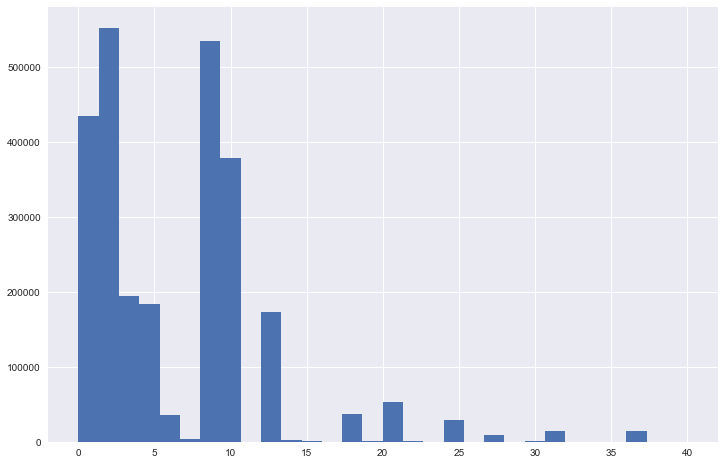

In [256]:
import seaborn as sns
plt.figure(figsize=(12, 8))



plt.hist(data['Volume_Sold_Liters'], bins = 30, range=(0,40) )

## I have to limit the range of the histogram, because there are several large outliers that skew the data.
## In most cases the volume sold is between 0- 5 and 8-10

### State Bottle Cost

In [257]:
data['State_Bottle_Cost'].describe()

count    2.709552e+06
mean     9.816209e+00
std      1.490656e+01
min      8.900000e-01
25%      5.510000e+00
50%      8.070000e+00
75%      1.196000e+01
max      6.468000e+03
Name: State_Bottle_Cost, dtype: float64

In [258]:
data.State_Bottle_Cost[data['State_Bottle_Cost'] > 200]

46928       236.42
47128       330.82
48609       407.02
48617       415.60
72996      6468.00
73166      5500.00
291878     5800.00
360984      280.00
360985      280.00
452410      726.81
472817      726.81
472818      726.81
472823      726.81
472826      726.81
515641      280.00
515643      280.00
515842      674.16
515844      224.16
515845      224.16
516095      483.00
516133      336.66
627997      419.99
711198     6100.00
721866     6100.00
766121      419.99
770046      419.99
782062      419.99
888965     5800.00
924980     5800.00
934879     6000.00
            ...   
1132628     280.00
1135798     280.00
1137500     280.00
1402426     245.00
1433615     498.64
1443471     498.64
1446197     498.64
1466347     498.64
1470879     498.64
1638683     299.99
1662637     349.99
1697327     299.99
1714844     299.99
1729194     299.99
1775734     419.99
1856253    1449.26
1957903     419.99
1972402     419.99
2105249    1399.29
2126670     349.99
2129995     349.99
2131629     

(array([  1.34096400e+06,   1.02562800e+06,   2.36251000e+05,
          8.54910000e+04,   1.25410000e+04,   2.22700000e+03,
          2.04400000e+03,   1.32300000e+03,   1.06900000e+03,
          2.13000000e+02]),
 array([  0.,   8.,  16.,  24.,  32.,  40.,  48.,  56.,  64.,  72.,  80.]),
 <a list of 10 Patch objects>)

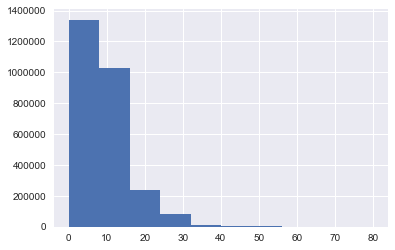

In [259]:
plt.hist(data['State_Bottle_Cost'] ,bins =10, range=(0,80) )

#Again, there are a few outliers that skew the histogram, but the majority of bottle costs are between 0 and 10

{'boxes': [<matplotlib.lines.Line2D at 0x1307f1390>],
 'caps': [<matplotlib.lines.Line2D at 0x1307e4250>,
 'fliers': [<matplotlib.lines.Line2D at 0x143549b90>],
 'means': [<matplotlib.lines.Line2D at 0x143549550>],
 'medians': [<matplotlib.lines.Line2D at 0x1307e4ed0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1307f14d0>,
  <matplotlib.lines.Line2D at 0x1307f1bd0>]}

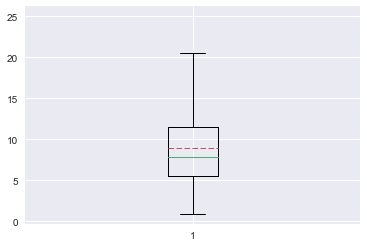

In [260]:
plt.boxplot(data.State_Bottle_Cost[data['State_Bottle_Cost'] < 25], showmeans=True, meanline=True)

### State Bottle Retail

(array([  619173.,  1247005.,   500355.,   203117.,    56381.,    62303.,
            9351.,     3977.,     1440.,     1960.]),
 array([  0.,   8.,  16.,  24.,  32.,  40.,  48.,  56.,  64.,  72.,  80.]),
 <a list of 10 Patch objects>)

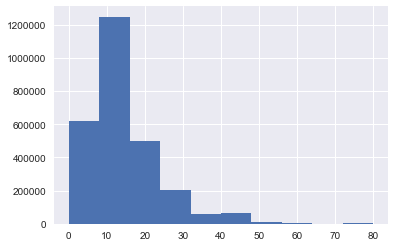

In [261]:
plt.hist(data['State_Bottle_Retail'] ,bins =10, range=(0,80) )

# We can see a shift in the histogram to a higher number for the same spread of values


{'boxes': [<matplotlib.lines.Line2D at 0x140ce7a50>],
 'caps': [<matplotlib.lines.Line2D at 0x140ced910>,
 'fliers': [<matplotlib.lines.Line2D at 0x131ff4290>],
 'means': [<matplotlib.lines.Line2D at 0x131fdac10>],
 'medians': [<matplotlib.lines.Line2D at 0x131fda5d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x140ce7b90>,
  <matplotlib.lines.Line2D at 0x140ced2d0>]}

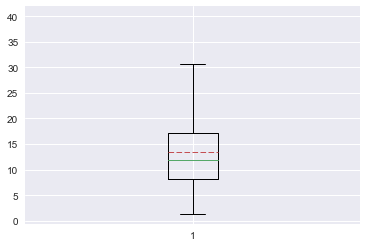

In [262]:
plt.boxplot(data.State_Bottle_Retail[data['State_Bottle_Retail'] < 40], showmeans=True, meanline=True)

### Sale(Dollars)

In [263]:
data.Sale_Dollars.describe()

count    2.709552e+06
mean     1.291191e+02
std      3.994615e+02
min      1.340000e+00
25%      3.048000e+01
50%      7.056000e+01
75%      1.350000e+02
max      1.063260e+05
Name: Sale_Dollars, dtype: float64

(array([ 655478.,  457937.,  495737.,  281185.,  234917.,  147600.,
         112912.,   64218.,   48702.,   50190.]),
 array([   0.,   30.,   60.,   90.,  120.,  150.,  180.,  210.,  240.,
         270.,  300.]),
 <a list of 10 Patch objects>)

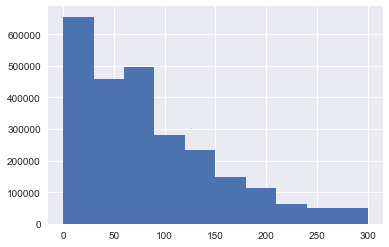

In [264]:
plt.hist(data['Sale_Dollars'] ,bins =10, range=(0,300))

## Most of the values cluster between 0 and 50.
                                               

# Record your findings

Be sure to write out anything observations from your exploratory analysis.


## Key EDA Findings

* Most costs are around 10
* Most sales are between 10 and 100
* There are a lot of empty country values
* The dataframe includes data for 1400 unique stores


# Mine the data

Now you are ready to compute the variables you will use for your regression from the data. For example, you may want to compute total sales per store from Jan to March of 2015, mean price per bottle, etc. Refer to the readme for more ideas appropriate to your scenario.

Pandas is your friend for this task. Take a look at the operations here for ideas on how to make the best use of pandas and feel free to search for blog and Stack Overflow posts to help you group data by certain variables and compute sums, means, etc. You may find it useful to create a new data frame to house this summary data.
 


In [265]:
sales_df = pd.DataFrame(data.groupby('Store_Number').Sale_Dollars.sum())

sales_df

,Sale_Dollars
Store_Number,
2106,1772173.90
2113,107500.05
2130,1415127.26
2152,85832.60
2178,336927.86
2190,1561550.77
2191,1578504.64
2200,279230.22
2205,231651.87


In [266]:
sales_df.sum()

Sale_Dollars    3.498549e+08
dtype: float64

In [267]:
data.groupby(data.Date).Sale_Dollars.sum()

#This is to many dates- let's look at this by month

Date
2015-01-05    1621501.80
2015-01-06    1149511.54
2015-01-07    1469466.12
2015-01-08    1019332.31
2015-01-12    1147093.19
2015-01-13    1202579.67
2015-01-14     825379.31
2015-01-15     931738.28
2015-01-16     941445.98
2015-01-20    1008364.61
2015-01-21    1420456.65
2015-01-22    1003176.98
2015-01-23       2608.36
2015-01-26    1528847.42
2015-01-27     900814.28
2015-01-28    1350540.10
2015-01-29     975651.71
2015-02-02    1478246.26
2015-02-03    1100506.08
2015-02-04    1551772.31
2015-02-05    1241992.40
2015-02-06       1739.52
2015-02-09    1774056.49
2015-02-10    1331928.21
2015-02-11    1855145.36
2015-02-12    1008147.68
2015-02-16    1413494.56
2015-02-17    1143801.97
2015-02-18    1276732.72
2015-02-19    1061228.25
                 ...    
2016-02-17    1543665.95
2016-02-18    1048587.31
2016-02-19         40.64
2016-02-22    1489320.99
2016-02-23    1166548.49
2016-02-24    1313995.91
2016-02-25    1208505.20
2016-02-29    1346115.14
2016-03-01    115628

In [268]:
#Adding a new column to the DF for month:

data['month'] = data['Date'].dt.month
data['year']= data['Date'].dt.year

In [269]:
months_df = pd.DataFrame(data.groupby(['year', 'month']).Sale_Dollars.sum())

months_df

Sale_Dollars
year month              
2015 1      1.849851e+07
     2      2.122435e+07
     3      2.326237e+07
     4      2.285726e+07
     5      2.243737e+07
     6      2.708968e+07
     7      2.241417e+07
     8      2.211640e+07
     9      2.411336e+07
     10     2.591325e+07
     11     2.371872e+07
     12     3.068314e+07
2016 1      1.901806e+07
     2      2.280184e+07
     3      2.370645e+07

In [270]:
counties_df = pd.DataFrame(data.groupby('County').Sale_Dollars.sum())
counties_df

,Sale_Dollars
County,
Adair,5.301801e+05
Adams,1.224313e+05
Allamakee,1.003697e+06
Appanoose,1.012266e+06
Audubon,2.109628e+05
Benton,9.047765e+05
Black Hawk,1.989110e+07
Boone,2.165657e+06
Bremer,2.169329e+06


In [271]:
stores_county = pd.DataFrame(data.groupby('County').Store_Number.nunique())
stores_county

,Store_Number
County,
Adair,8
Adams,1
Allamakee,6
Appanoose,6
Audubon,3
Benton,6
Black Hawk,73
Boone,15
Bremer,9


## Creating a new Dataframe

I want to create a new dataframe to make my analysis and model building easier. I will add the following columns:

 * The vendor number/index
 * The location data (zip code, county, city)
 * The total sales for the year
 * The total sales by quarter
 * The total volume sold
 * The total number of bottles sold
 * The average price per bottle (perhaps useful for distinguishing store types)
 
 I can build this by creating all of my columns indexed by store number and concatinating them

In [272]:
#Sales by location for 2015:
df_2015 = data[data['year']== 2015]

sales_2015 = pd.DataFrame(df_2015.groupby('Store_Number').Sale_Dollars.sum())
sales_2015.columns = ['Sales_Dollars_total_2015']

print len(sales_2015)

print sales_2015.isnull().sum()

1375
Sales_Dollars_total_2015    0
dtype: int64


In [273]:
#Sales by location for 2016:

df_2016 = data[data['year']==2016]
sales_2016 = pd.DataFrame(df_2016.groupby('Store_Number').Sale_Dollars.sum())
sales_2016.columns = ['Sales_Dollars_total_2016']

print len(sales_2016)

print sales_2016.isnull().sum()

1320
Sales_Dollars_total_2016    0
dtype: int64


In [274]:
## Volume Sold 2015
df_q1_2015 = (data[(data['year']==2015) & (data['month'] <=3)])
df_q1_2015_volume_sold= pd.DataFrame(df_q1_2015.groupby('Store_Number').Volume_Sold_Liters.sum())
df_q1_2015_volume_sold.columns = ['Volume_Sold_2015']

In [275]:
#Sales by location for Q1 2015

df_q1_2015 = (data[(data['year']==2015) & (data['month'] <=3)])

df_q1_2015_by_store= pd.DataFrame(df_q1_2015.groupby('Store_Number').Sale_Dollars.sum())
df_q1_2015_by_store.columns = ['Sales_Dollars_q1_2015']


In [276]:
#Sales by location Q1 2016

df_q1_2016 = (data[(data['year']==2016) & (data['month'] <=3 )])
df_q1_2016_by_store= pd.DataFrame(df_q1_2016.groupby('Store_Number').Sale_Dollars.sum())
df_q1_2016_by_store.columns = ['Sales_Dollars_q1_2016']

In [277]:
#Sales by location for Q2,Q3,Q4
df_q234_2015 = (data[(data['year']==2015) & (data['month'] >=4)])

df_q234_2015_by_store= pd.DataFrame(df_q234_2015.groupby('Store_Number').Sale_Dollars.sum())
df_q234_2015_by_store.columns = ['Sales_Dollars_q234_2015']
len(df_q234_2015_by_store)

1342

In [278]:
## Average Sale Price for Q1 2015

avg_price_2015 = pd.DataFrame(df_q1_2015.groupby('Store_Number').Sale_Dollars.mean())
avg_price_2015.columns = ['average_price_2015']


In [279]:
##Total Volume Sold
df_volume_sold = pd.DataFrame(data.groupby('Store_Number').Volume_Sold_Liters.sum())
len(df_volume_sold)

1403

In [280]:
##Total Number of Bottles Sold
df_bottles_sold = pd.DataFrame(data.groupby('Store_Number').Bottles_Sold.sum())
len(df_bottles_sold)

1403

In [281]:
## City
## There's probably a more efficient way to do this, but I'm just going to remove all of the columns
## except store number and city and then remove duplicates

data_for_cities = data[['Store_Number', 'City']]

data_for_cities.City.str.upper
    
data_for_cities = data_for_cities.drop_duplicates()

data_for_cities.set_index('Store_Number', inplace=True)




In [282]:
## Creating the final dataframe:

data_new= pd.concat([
                     sales_2015, 
                     sales_2016,
                     avg_price_2015,
                     df_bottles_sold, 
                     df_volume_sold, 
                     df_q1_2015_volume_sold,
                     df_q1_2015_by_store, 
                     df_q234_2015_by_store, 
                     df_q1_2016_by_store],
                     axis=1)

In [283]:
print data_new.columns

Index([u'Sales_Dollars_total_2015', u'Sales_Dollars_total_2016',
       u'average_price_2015', u'Bottles_Sold', u'Volume_Sold_Liters',
       u'Volume_Sold_2015', u'Sales_Dollars_q1_2015',
       u'Sales_Dollars_q234_2015', u'Sales_Dollars_q1_2016'],
      dtype='object')


In [284]:
print data_new.isnull().sum()
print len(data_new)
## There are some null values, but only because some stores did not have sales in certain years

a = data_new['Sales_Dollars_q234_2015'].sum() 
b = data_new['Sales_Dollars_q1_2015'].sum() 
c = data_new['Sales_Dollars_q1_2016'].sum()

print a + b + c

Sales_Dollars_total_2015     28
Sales_Dollars_total_2016     83
average_price_2015          120
Bottles_Sold                  0
Volume_Sold_Liters            0
Volume_Sold_2015            120
Sales_Dollars_q1_2015       120
Sales_Dollars_q234_2015      61
Sales_Dollars_q1_2016        83
dtype: int64
1403
349854916.29


# Refine the data

Look for any statistical relationships, correlations, or other relevant properties of the dataset.

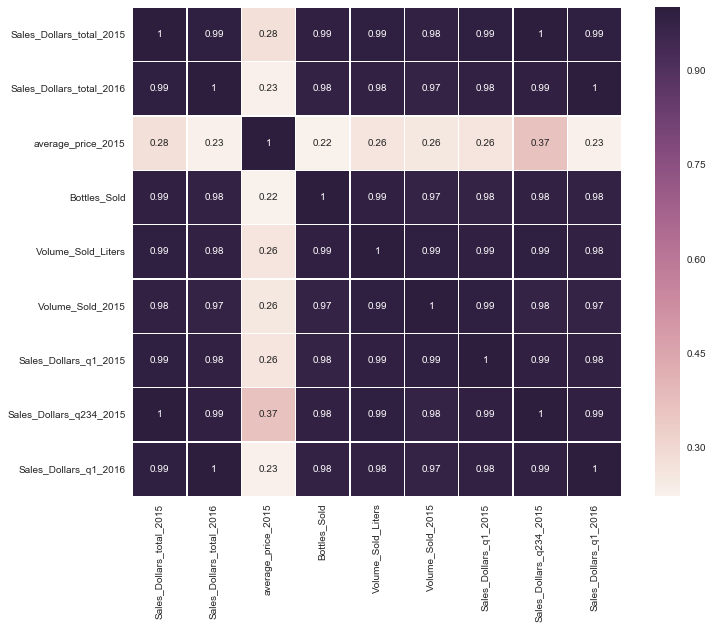

In [285]:
corrmat = data_new.corr()

f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, square=True, linewidths=.5,annot=True)



Everything in the new dataframe is highly correlated. This is not surprising, since they're all basically desribing the amount sold.

As the numbers of bottles sold, volume sold, etc increases the other varibales also increase. What can we do with this information to build our model?


In [286]:
data_new_drop = data_new.dropna(axis=0, how = 'any')


# Build your models

Using scikit-learn or statsmodels, build the necessary models for your scenario. Evaluate model fit.

## Goal : Build a model to predict the sales for the remaining nine months in 2016.

What I want to predict is the sales for April to December in 2016, but I need to use my data from 2015 to make the model.

### Model 

In [287]:

from sklearn.model_selection import train_test_split #import train test split from model selection
from sklearn.linear_model import LinearRegression


# X = data_new_dropped[['Sales_Dollars_q1_2015', 'Volume_Sold_2015']]
X = data_new_drop[['Sales_Dollars_q1_2015']]
y = pd.DataFrame(data_new_drop['Sales_Dollars_q234_2015'])


In [288]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8) #split the data in half (train_size = .05)

lr = LinearRegression()
model = lr.fit(X_train, y_train)

In [289]:
predictions = lr.predict(X_test)

In [290]:
lr.score(X_test, y_test) 

0.93371445829270494

Our model performed extremely well on our test values. I'm concerned that this may be overfitting, especially since the Q1 and Q2-4 columns are so highly correlated.  I can correct for some of this by using regression to reduce the coeffecients of my formula.

## K -fold Cross Validation

Cross-validated scores: [ 0.97074797  0.97027417  0.95112971  0.94423197  0.94161586  0.99786078
  0.97108559  0.99535502  0.9233677   0.90817252]
Cross-Predicted Accuracy: 0.977012132699


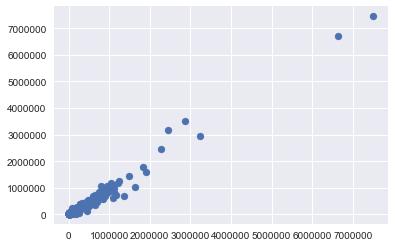

In [315]:
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

scores = cross_val_score(model, X_train, y_train, cv=10)
print "Cross-validated scores:", scores
# Make cross validated predictions
predictions = cross_val_predict(model, X_train, y_train, cv=10)
plt.scatter(y_train, predictions)
accuracy = metrics.r2_score(y_train, predictions)
print "Cross-Predicted Accuracy:", accuracy


These scores are really good.  I feel very confidant about the predicting value of my model.

## Regression Model

In [291]:
from sklearn.linear_model import Lasso

lassoreg = Lasso(alpha=50, normalize=True)
model_lass = lassoreg.fit(X_train, y_train)

In [292]:
predictions_lasso = lassoreg.predict(X_test)

In [293]:
lassoreg.score(X_test, y_test)

0.93291748516002626

The lasso regression model performs worse than the other model.  Additionally, since there is only one varaible I do not have to adjust any coeffecients - there's not one that will overpower another. For this reason, my final results will be produced with the original model.

# Plot your results

Again make sure that you record any valuable information. For example, in the tax scenario, did you find the sales from the first three months of the year to be a good predictor of the total sales for the year? Plot the predictions versus the true values and discuss the successes and limitations of your models

### Model  Plotting

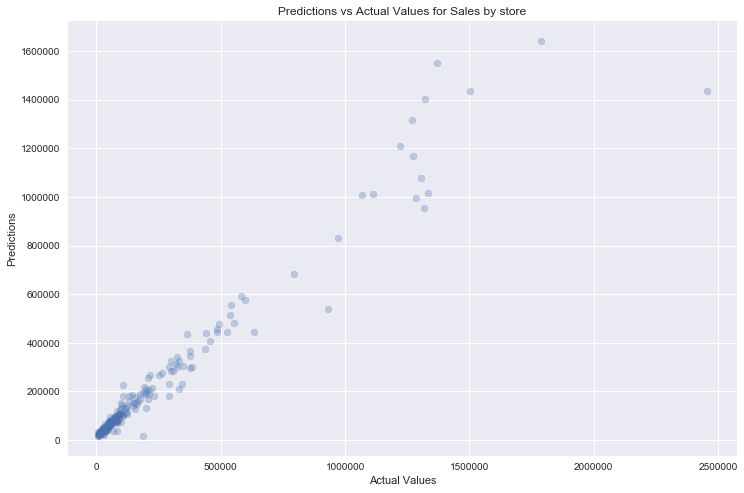

In [294]:
plt.figure(figsize=(12, 8))

plt.scatter(y_test, predictions, alpha=.3)
plt.xlabel('Actual Values')
plt.ylabel('Predictions')

plt.title('Predictions vs Actual Values for Sales by store')

### Applying the Model to Predict April - December 2016

Now that I have my model I need to gather the X values that I will use for my final prediction. 
This will be the input I used for my testing and prediction:
    The Q1 2016 sales data

In [295]:
q1_dropped = data_new[['Sales_Dollars_q1_2016']].dropna(how='any')
X_final = q1_dropped
 
predictions_2016 = lr.predict(X_final)

In [296]:
sum(X_final['Sales_Dollars_q1_2016'])

65526344.180000052

In [312]:
sum_final_2016 = sum(predictions_2016) + sum(X_final['Sales_Dollars_q1_2016'])

sum_final_2015 = sum(data_new_drop['Sales_Dollars_q1_2015']) + sum(data_new_drop['Sales_Dollars_q234_2015'])

print "The predicted sales for Qs 2, 3, and 4 is " + str(sum(predictions_2016))
print (sum_final_2015, sum_final_2016)
                     
print "The total of all liquor sales by dollar in 2016 is " + str(sum_final_2016)
print "The total of all liquor sales by dollar in 2015 is " + str(sum_final_2015)

print "This is an increase of " +str((sum_final_2016/sum_final_2015 *100) - 100)

The predicted sales for Qs 2, 3, and 4 is [  2.27303980e+08]
(275154836.41000056, array([  2.92830324e+08]))
The total of all liquor sales by dollar in 2016 is [  2.92830324e+08]
The total of all liquor sales by dollar in 2015 is 275154836.41
This is an increase of [ 6.42383305]


In [298]:
#Doing some final testing to make sure no values got dropped in cleaning.

print sum(data['Sale_Dollars'])
print X_final['Sales_Dollars_q1_2016'].sum() + data_new['Sales_Dollars_q1_2015'].sum() + data_new['Sales_Dollars_q234_2015'].sum()

349854916.289
349854916.29
